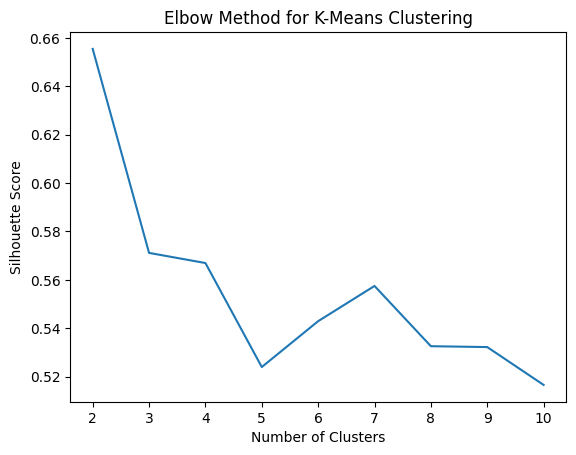

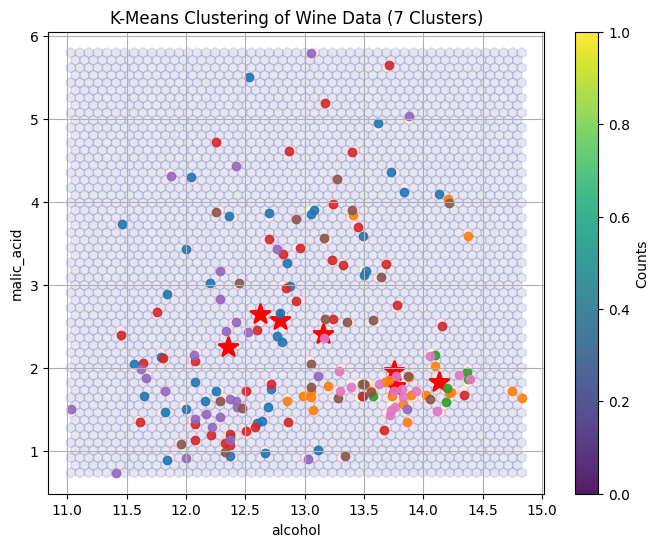

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

wine = load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Perform K-Means clustering with varying number of clusters to find optimal K
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(wine_data)
    silhouette_scores.append(silhouette_score(wine_data, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Elbow Method for K-Means Clustering")
plt.show()

# Perform K-Means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(wine_data)

# Visualize the clustering results
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Extract the first two features for visualization
features_to_plot = [0, 1]

plt.figure(figsize=(8, 6))
plt.hexbin(wine_data.iloc[:, features_to_plot[0]], wine_data.iloc[:, features_to_plot[1]],
           gridsize=50, cmap='plasma', alpha=0.1)
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, features_to_plot[0]], cluster_centers[:, features_to_plot[1]],
            marker='*', c='red', s=200, linewidths=2)
for cluster_label in range(7):
    cluster_data = wine_data[cluster_labels == cluster_label]
    plt.scatter(cluster_data.iloc[:, features_to_plot[0]], cluster_data.iloc[:, features_to_plot[1]],
                label=f'Cluster {cluster_label}', alpha=0.9)

plt.xlabel(wine.feature_names[features_to_plot[0]])
plt.ylabel(wine.feature_names[features_to_plot[1]])
plt.title('K-Means Clustering of Wine Data (7 Clusters)')
plt.colorbar(label='Counts')
plt.grid(True)
plt.show()
